In [23]:
from nlb_tools.nwb_interface import NWBDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [24]:
foldername = "~/area2_population_analysis/s1-kinematics/actpas_NWB/"
monkey = "Lando_20170731"
filename = foldername + monkey + "_COactpas_TD.nwb"

dataset = NWBDataset(filename, split_heldout=False)

In [25]:
# force - forces and torques applied to the manipulandum. x, y, and z are the forces applied in their respective directions, while xmo, ymo, and zmo are the torques in those directions
# hand_pos - x and y position of the hand, in cm
# hand_vel - x and y velocity of the hand, in cm/s
# joint_ang - angle of various monkey arm joints, in degrees
# joint_vel - velocity of various monkey arm joints, in degrees/s
# muscle_len - length of various monkey arm muscles, in m
# muscle_vel - velocity of various monkey arm muscles, in m/s
# spikes - spike trains binned at 1 ms

In [26]:
dataset.data.spikes

channel,500,600,601,602,901,1300,1301,1500,1700,2101,...,8701,8800,8901,9000,9100,9201,9301,9302,9400,9600
clock_time,,,,,,,,,,,,,,,,,,,,,
0 days 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0 days 00:00:00.001000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0 days 00:00:00.002000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0 days 00:00:00.003000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0 days 00:00:00.004000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 00:44:54.922000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0 days 00:44:54.923000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0 days 00:44:54.924000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
dataset.trial_info

,trial_id,start_time,end_time,result,ctr_hold,ctr_hold_bump,bump_dir,target_on_time,target_dir,go_cue_time,bump_time,cond_dir,split,move_onset_time
0,0,0 days 00:00:01.791000,0 days 00:00:04.109000,R,1.353227,False,NaN,0 days 00:00:03.149000,0.0,0 days 00:00:03.150000,NaT,0.0,train,0 days 00:00:03.533000
1,1,0 days 00:00:05.112000,0 days 00:00:08.658000,R,1.231274,True,90.0,0 days 00:00:06.650000,0.0,0 days 00:00:06.651000,0 days 00:00:05.998000,90.0,train,0 days 00:00:05.948000
2,2,0 days 00:00:09.662000,0 days 00:00:12.165000,R,1.443347,False,NaN,0 days 00:00:11.110000,270.0,0 days 00:00:11.111000,NaT,270.0,train,0 days 00:00:11.423000
3,3,0 days 00:00:13.168000,0 days 00:00:15.607000,R,1.237965,False,NaN,0 days 00:00:14.410000,270.0,0 days 00:00:14.411000,NaT,270.0,train,0 days 00:00:14.705000
4,4,0 days 00:00:16.612000,0 days 00:00:19.230000,R,1.440382,True,270.0,0 days 00:00:18.359000,0.0,0 days 00:00:18.360000,0 days 00:00:17.259000,270.0,train,0 days 00:00:17.228000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,787,0 days 00:44:13.280000,0 days 00:44:15.383000,R,1.178791,False,NaN,0 days 00:44:14.462000,0.0,0 days 00:44:14.463000,NaT,0.0,train,0 days 00:44:14.805000
788,788,0 days 00:44:16.387000,0 days 00:44:18.637000,R,1.084311,True,270.0,0 days 00:44:17.776000,270.0,0 days 00:44:17.777000,0 days 00:44:16.659000,270.0,train,0 days 00:44:16.609000
789,789,0 days 00:44:19.641000,0 days 00:44:21.941000,R,1.305556,True,90.0,0 days 00:44:21.251000,270.0,0 days 00:44:21.252000,0 days 00:44:19.904000,90.0,train,0 days 00:44:19.854000
790,790,0 days 00:44:22.945000,0 days 00:44:25.321000,R,1.221853,True,90.0,0 days 00:44:24.471000,180.0,0 days 00:44:24.472000,0 days 00:44:23.503000,90.0,train,0 days 00:44:23.478000


In [28]:
active_mask = (~dataset.trial_info.ctr_hold_bump) & (dataset.trial_info.split != 'none')
passive_mask = (dataset.trial_info.ctr_hold_bump) & (dataset.trial_info.split != 'none')


trial_mask = active_mask
n_trials = dataset.trial_info.loc[trial_mask].shape[0]
print(n_trials,'active trials')

trial_mask = passive_mask
n_trials = dataset.trial_info.loc[trial_mask].shape[0]
print(n_trials,'passive trials')

371 active trials
346 passive trials


In [29]:
dataset.trial_info.cond_dir.unique()

array([ 0.00000000e+00,  9.00000000e+01,  2.70000000e+02,  1.80000000e+02,
       -3.26203783e+38,             nan, -3.44648579e+38])

In [30]:
# trial_id - a number assigned to each trial during loading
# start_time - time when the trial begins
# end_time - time when the trial ends
# result - whether a trial was rewarded (R), aborted (A), incomplete (I), or failed (F)
# ctr_hold - the amount of time the monkey had to hold in the center before the reach
# ctr_hold_bump - whether there was a bump during the center hold period
# bump_dir - direction of the bump, in degrees. If there was no bump, bump_dir is NaN
# target_on_time - time of target presentation
# target_dir - direction to the target, in degrees
# go_cue_time - time of go cue
# bump_time - time of center hold bump, if there was one
# move_time - time of movement onset, either in response to the go cue for active trials or the center hold bump for passive trials
# cond_dir - bump_dir for passive trials and target_dir for active trials. Though it is redundant with information already in other fields, it is provided for convenience when filtering trials

In [31]:
print(dataset.trial_info.split.unique())

['train' 'none']


In [35]:
dataset.descriptions

{'start_time': 'Start time of epoch, in seconds',
 'stop_time': 'Stop time of epoch, in seconds',
 'result': "Result of the trial, either 'R' (reward), 'A' (abort), 'I' (incomplete) or 'F' (fail)",
 'ctr_hold': 'Required hold time on center before reach, in seconds',
 'ctr_hold_bump': 'Whether there was bump during center hold',
 'bump_dir': 'Angle (in degrees) of bump direction, if there was one. 0 degrees is directly to the right, and 90 degrees is directly upward',
 'target_on_time': 'Time of target presentation',
 'target_dir': 'Direction of target, in degrees. 0 degrees is directly to the right, and 90 degrees is directly upward',
 'go_cue_time': 'Time of go cue delivery',
 'bump_time': 'Time of bump delivery, if there was one',
 'cond_dir': 'Direction of bump for passive trials and target direction for active trials, for convenience when filtering trials',
 'split': 'Trial split that the trial belongs to. Can be "train", "val", "test", or "none"',
 'move_onset_time': 'Time of mov

In [36]:
dataset.bin_width

1

In [37]:
dataset.resample(5)
print(dataset.bin_width)

5


In [38]:
# dataset.smooth_spk(40, name='smth_40')
# dataset.smooth_spk(25, name='smth_25')
# dataset.smooth_spk(10, name='smth_10')

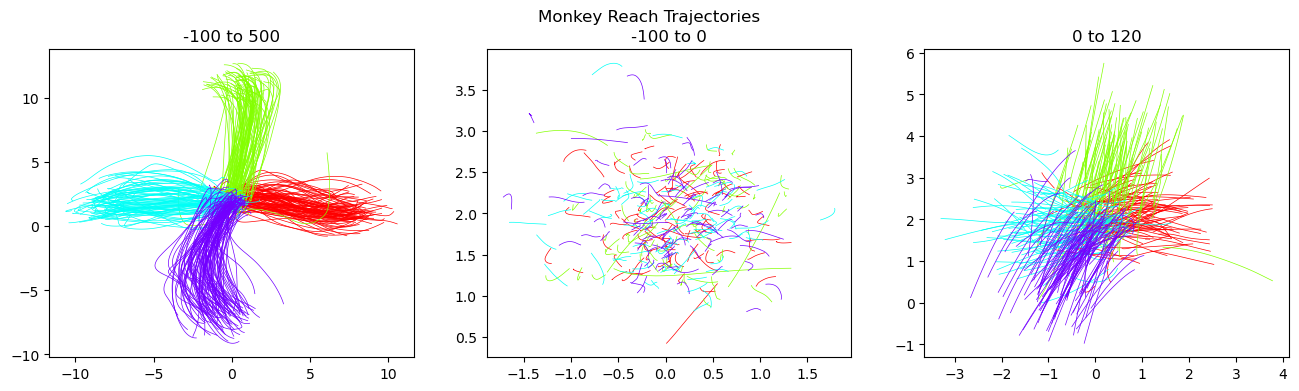

In [39]:
# All 16 conditions, in the format (ctr_hold_bump, cond_dir)
# unique_conditions = [(False, 0.0), (False, 45.0), (False, 90.0), (False, 135.0),
#                      (False, 180.0), (False, 225.0), (False, 270.0), (False, 315.0),
#                      (True, 0.0), (True, 45.0), (True, 90.0), (True, 135.0),
#                      (True, 180.0), (True, 225.0), (True, 270.0), (True, 315.0)]

unique_conditions = [(False, 0.0), (False, 90.0), 
                     (False, 180.0), (False, 270.0), 
                     (True, 0.0),(True, 90.0), 
                     (True, 180.0), (True, 270.0)]

# Initialize figure
fig = plt.figure(figsize=(16, 4))
ax_whole = fig.add_subplot(1, 3, 1)
ax_before = fig.add_subplot(1, 3, 2)
ax_after = fig.add_subplot(1, 3, 3)

for cond in unique_conditions:
    # Filter out invalid trials (labeled 'none') and trials in other conditions
    cond_mask = (np.all(dataset.trial_info[['ctr_hold_bump', 'cond_dir']] == cond, axis=1)) & \
                (dataset.trial_info.split != 'none')
    # Extract relevant portion of selected trials
    cond_data = dataset.make_trial_data(align_field='move_onset_time', align_range=(-100, 500), ignored_trials=~cond_mask)
    # Plot reaches on appropriate subplot
    for idx, trial in cond_data.groupby('trial_id'):
        if cond[0]==False: 
            ax_whole.plot(trial.hand_pos.x, trial.hand_pos.y, color=plt.cm.hsv(cond[1] / 360), linewidth=0.5)
 
    cond_data = dataset.make_trial_data(align_field='move_onset_time', align_range=(-100, 0), ignored_trials=~cond_mask)
    # Plot reaches on appropriate subplot
    for idx, trial in cond_data.groupby('trial_id'):
        if cond[0]==False: 
            ax_before.plot(trial.hand_pos.x, trial.hand_pos.y, color=plt.cm.hsv(cond[1] / 360), linewidth=0.5)
            
    cond_data = dataset.make_trial_data(align_field='move_onset_time', align_range=(0, 120), ignored_trials=~cond_mask)
    # Plot reaches on appropriate subplot
    for idx, trial in cond_data.groupby('trial_id'):
        if cond[0]==False: 
            ax_after.plot(trial.hand_pos.x, trial.hand_pos.y, color=plt.cm.hsv(cond[1] / 360), linewidth=0.5)
            
# Add labels
ax_whole.set_title('-100 to 500')
ax_before.set_title('-100 to 0')
ax_after.set_title('0 to 120')

plt.suptitle('Monkey Reach Trajectories')
plt.show()

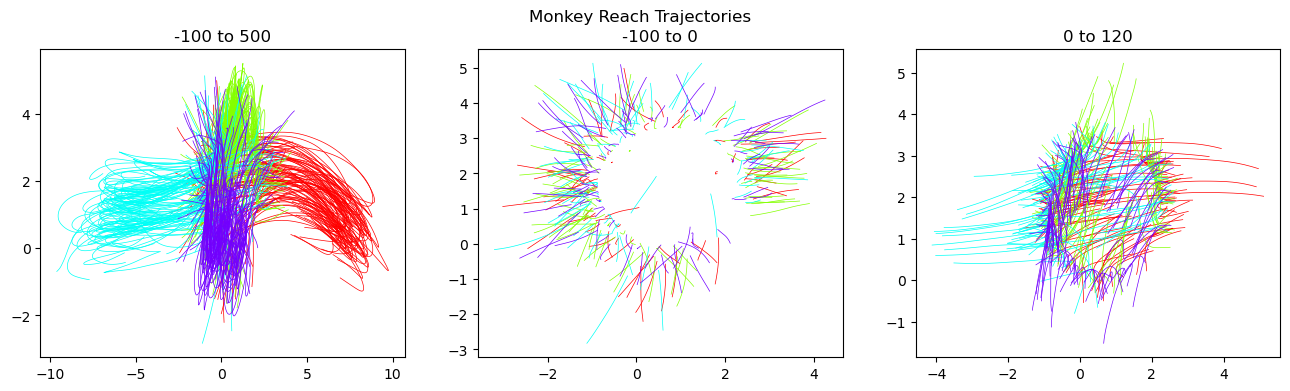

In [40]:
# All 16 conditions, in the format (ctr_hold_bump, cond_dir)
# unique_conditions = [(False, 0.0), (False, 45.0), (False, 90.0), (False, 135.0),
#                      (False, 180.0), (False, 225.0), (False, 270.0), (False, 315.0),
#                      (True, 0.0), (True, 45.0), (True, 90.0), (True, 135.0),
#                      (True, 180.0), (True, 225.0), (True, 270.0), (True, 315.0)]

unique_conditions = [(False, 0.0), (False, 90.0), 
                     (False, 180.0), (False, 270.0), 
                     (True, 0.0),(True, 90.0), 
                     (True, 180.0), (True, 270.0)]

# Initialize figure
fig = plt.figure(figsize=(16, 4))
ax_whole = fig.add_subplot(1, 3, 1)
ax_before = fig.add_subplot(1, 3, 2)
ax_after = fig.add_subplot(1, 3, 3)

for cond in unique_conditions:
    # Filter out invalid trials (labeled 'none') and trials in other conditions
    cond_mask = (np.all(dataset.trial_info[['ctr_hold_bump', 'cond_dir']] == cond, axis=1)) & \
                (dataset.trial_info.split != 'none')
    # Extract relevant portion of selected trials
    cond_data = dataset.make_trial_data(align_field='move_onset_time', align_range=(-100, 500), ignored_trials=~cond_mask)
    # Plot reaches on appropriate subplot
    for idx, trial in cond_data.groupby('trial_id'):
        if cond[0]==True: 
            ax_whole.plot(trial.hand_pos.x, trial.hand_pos.y, color=plt.cm.hsv(cond[1] / 360), linewidth=0.5)
 
    cond_data = dataset.make_trial_data(align_field='move_onset_time', align_range=(-100, 0), ignored_trials=~cond_mask)
    # Plot reaches on appropriate subplot
    for idx, trial in cond_data.groupby('trial_id'):
        if cond[0]==True: 
            ax_before.plot(trial.hand_pos.x, trial.hand_pos.y, color=plt.cm.hsv(cond[1] / 360), linewidth=0.5)
            
    cond_data = dataset.make_trial_data(align_field='move_onset_time', align_range=(0, 120), ignored_trials=~cond_mask)
    # Plot reaches on appropriate subplot
    for idx, trial in cond_data.groupby('trial_id'):
        if cond[0]==True: 
            ax_after.plot(trial.hand_pos.x, trial.hand_pos.y, color=plt.cm.hsv(cond[1] / 360), linewidth=0.5)
            
# Add labels
ax_whole.set_title('-100 to 500')
ax_before.set_title('-100 to 0')
ax_after.set_title('0 to 120')

plt.suptitle('Monkey Reach Trajectories')
plt.show()

In [24]:
#number of neurons
n_neurons = dataset.data.spikes.shape[1]
print(n_neurons)

65


In [15]:
# number of useable active trials
# Filter out invalid trials (labeled 'none') and trials in other conditions
active_mask = (np.all(dataset.trial_info[['ctr_hold_bump']] == False, axis=1)) & \
    (dataset.trial_info.split != 'none')
active_data = dataset.make_trial_data(align_field='move_onset_time', align_range=(-100, 500), ignored_trials=~active_mask)
n_trials = active_data['trial_id'].nunique();
print(n_trials)

463


In [15]:
#number of time bins per trial = align_range / bin_size
for idx, trial in active_data.groupby('trial_id'):
    n_timepoints = trial.shape[0]
    break
print(n_timepoints)

240


In [16]:
active_trials_idx_array = np.empty((n_trials,1))
raw_active_trials_array = np.empty((n_trials,n_timepoints,n_neurons))
active_trials_smth_10_array = np.empty((n_trials,n_timepoints,n_neurons))
active_trials_smth_25_array = np.empty((n_trials,n_timepoints,n_neurons))
active_trials_smth_40_array = np.empty((n_trials,n_timepoints,n_neurons))
i = 0
for idx, trial in active_data.groupby('trial_id'):
    active_trials_idx_array[i,:]=idx
    raw_active_trials_array[i,:,:]=trial.spikes.to_numpy()
    active_trials_smth_10_array[i,:,:]=trial.spikes_smth_10.to_numpy()
    active_trials_smth_25_array[i,:,:]=trial.spikes_smth_25.to_numpy()
    active_trials_smth_40_array[i,:,:]=trial.spikes_smth_40.to_numpy()
    i+=1

In [17]:
print(active_trials_smth_40_array.shape)
print(active_trials_idx_array.shape)

(193, 240, 65)
(193, 1)


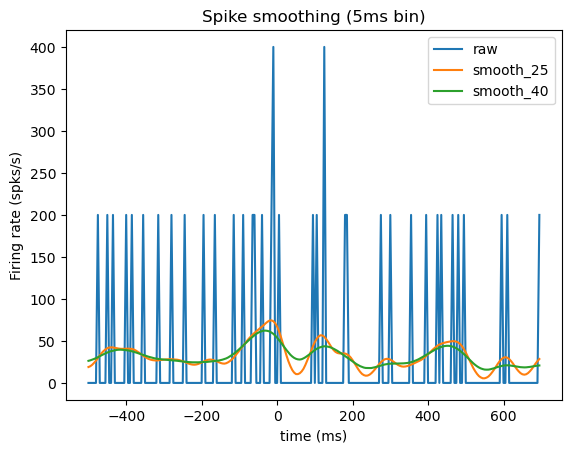

In [18]:
x_axis = np.arange(-500,700,5)
plt.plot(x_axis,raw_active_trials_array[0,:,10]/dataset.bin_width*1000,label = 'raw')
plt.plot(x_axis,active_trials_smth_10_array[0,:,10]/dataset.bin_width*1000 ,label='smooth_10')
plt.plot(x_axis,active_trials_smth_25_array[0,:,10]/dataset.bin_width*1000 ,label='smooth_25')
plt.plot(x_axis,active_trials_smth_40_array[0,:,10]/dataset.bin_width*1000 ,label='smooth_40')
plt.title('Spike smoothing (5ms bin)')
plt.ylabel('Firing rate (spks/s)')
plt.xlabel('time (ms)')
plt.legend()